In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define Inputs

In [3]:
# inputs: code-ocean 

data_folder = Path("/root/capsule/data/") # Note: full path, glob doesn't like ~
processed_path = data_folder / "multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44"
plane_folder_path = processed_path / "1287841795" # 1 of 8 possible planes
raw_path = data_folder / "multiplane-ophys_677594_2023-08-04_09-44-08"

In [2]:
# inputs: local

processed_path = "/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/"
plane_folder_path = "/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/1299958728"


# Grab Ophys / Behavior 

In [4]:
from comb.ophys_plane_grabber import OphysPlaneGrabber
opg = OphysPlaneGrabber(plane_folder_path, verbose=False)
opg.file_paths

{'platform_json': PosixPath('/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/1299958728/1299958728_platform.json'),
 'processing_json': PosixPath('/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/1299958728/processing.json'),
 'params_json': PosixPath('/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/1299958728/events/1300116382_params.json'),
 'registered_metrics_json': PosixPath('/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/1299958728/movie-qc/1300116382_registered_metrics.json'),
 'output_json': PosixPath('/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/1299958728/segmentation/segmentation_output.json'),
 'average_projection_png': None,
 'max_projection_png': None,
 'motion_transform_csv': None,
 'segmentation_output_json': PosixPath('/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/12

# BehaviorOphysDataset

In [10]:
from comb.behavior_ophys_dataset import BehaviorOphysDataset

In [11]:
bod = BehaviorOphysDataset(plane_folder_path,raw_path)

Currently sync file stored in raw data assest, will load since raw_folder_path is provided (02/01/2024)


In [ ]:
pkl_file = bod.behavior_stimulus_file

In [13]:
bod.licks

,timestamps,frame
0,252.08759,13845
1,321.93027,18032
2,322.64779,18075
3,327.78489,18383
4,330.83745,18566
5,343.43138,19321
6,351.10461,19781
7,390.15450,22122
8,434.30901,24769
9,434.59185,24786


In [42]:
bod.events

,events,filtered_events
cell_specimen_id,,
1,"[0.0, 0.06165707505213869, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.06165707505213869, 0.0, 0.0, 0.0, 0.0,..."
12,"[0.0, 0.0, 0.06637341389303658, 0.0, 0.0, 0.07...","[0.0, 0.0, 0.06637341389303658, 0.0, 0.0, 0.07..."
13,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.13180522606897782,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.13180522606897782,..."
14,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15,"[0.0, 0.0, 0.06204877944450454, 0.023810101078...","[0.0, 0.0, 0.06204877944450454, 0.023810101078..."
...,...,...
81,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
82,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
83,"[0.0, 0.0, 0.0, 0.11092722520736535, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.11092722520736535, 0.0, 0.0,..."


# BehaviorMultiplaneOphysDataset

In [6]:
from comb.behavior_ophys_dataset import BehaviorMultiplaneOphysDataset
session_folder_path = processed_path
bmod = BehaviorMultiplaneOphysDataset(session_folder_path, raw_path)

bmod.ophys_datasets

{'1287841801': <comb.ophys_plane_dataset.OphysPlaneDataset at 0x7efe7c1043a0>,
 '1287841799': <comb.ophys_plane_dataset.OphysPlaneDataset at 0x7efe55564c70>,
 '1287841795': <comb.ophys_plane_dataset.OphysPlaneDataset at 0x7efe5546d0d0>,
 '1287841805': <comb.ophys_plane_dataset.OphysPlaneDataset at 0x7efe555956a0>,
 '1287841797': <comb.ophys_plane_dataset.OphysPlaneDataset at 0x7efe555026a0>,
 '1287841807': <comb.ophys_plane_dataset.OphysPlaneDataset at 0x7efe5558f8b0>,
 '1287841802': <comb.ophys_plane_dataset.OphysPlaneDataset at 0x7efe5558fca0>,
 '1287841804': <comb.ophys_plane_dataset.OphysPlaneDataset at 0x7efe5563fa00>}

In [7]:
# get all traces
traces = bmod.all_traces_array(traces_key="dff") # can be "dff", "events", "filtered_events"
#traces= bmod.all_traces_array(traces_key="events")

# get vmin and vmax for all planes, 1 percentile and 99 percentile
vmin = np.percentile(traces, 1)
vmax = np.percentile(traces, 99.3)

dff not found for: 1287841807


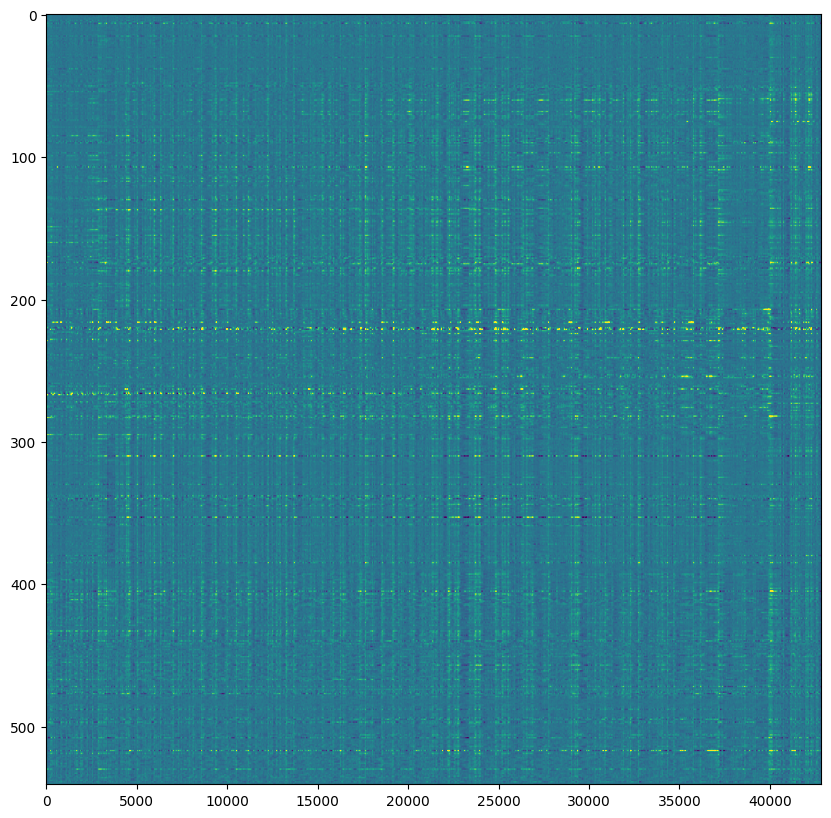

In [9]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(traces, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
plt.show()

# OphysPlaneDataset

In [5]:
from comb.ophys_plane_dataset import OphysPlaneDataset

In [6]:
dataset = OphysPlaneDataset(plane_folder_path=plane_folder_path, verbose=True)


_platform.json: 1287841795/1287701514_platform.json
processing.json: 1287841795/processing.json
_params.json: events/1287841795_params.json
_registered_metrics.json: movie_qc/1287841795_registered_metrics.json
_output.json: segmentation/segmentation_output.json
_average_projection.png: motion_correction/1287841795_average_projection.png
_max_projection.png: not found
_motion_transform.csv: motion_correction/1287841795_motion_transform.csv
segmentation_output.json: segmentation/segmentation_output.json
roi_traces.h5: trace_extraction/roi_traces.h5
neuropil_correction.h5: neuropil_correction/neuropil_correction.h5
neuropil_masks.json: trace_extraction/neuropil_masks.json
neuropil_trace_output.json: neuropil_correction/neuropil_trace_output.json
demixing_output.h5: demixing/demixing_output.h5
demixing_output.json: demixing/demixing_output.json
dff.h5: dff/dff.h5
extract_traces.json: trace_extraction/extract_traces.json
events_oasis.h5: events/1287841795_events_oasis.h5


In [7]:
dataset.dff_traces

,dff,baseline,noise,skewness
cell_specimen_id,,,,
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
1,"[0.3501062935922123, 0.477602021911333, 0.4312...","[505.6397040812572, 505.6397040812572, 505.639...",55.879718,1.047109
10,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
11,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
12,"[0.18570515943607185, 0.1590643114591885, 0.26...","[806.269570249312, 806.6308185003484, 806.4501...",42.348114,0.844889
...,...,...,...,...
85,"[0.10481134856622669, 0.030425329330776477, 0....","[408.9423018190653, 408.8236278429837, 408.823...",44.430887,0.480789
86,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
87,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN


# BehaviorSessionDataset

In [10]:
from comb.behavior_session_dataset import BehaviorSessionDataset
bs = BehaviorSessionDataset(raw_path)

In [11]:
bs.licks

,timestamps,frame
0,252.08759,13845
1,321.93027,18032
2,322.64779,18075
3,327.78489,18383
4,330.83745,18566
5,343.43138,19321
6,351.10461,19781
7,390.15450,22122
8,434.30901,24769
9,434.59185,24786


In [12]:
# note: calculate running speed, lower temporal resolution; 
bs.running_speed

,timestamps,speed
0,21.14431,1.165418e-02
1,21.15926,1.055290e-01
2,21.17594,2.010443e-01
3,21.19260,2.982067e-01
4,21.20930,3.953372e-01
...,...,...
270015,4525.31627,2.844593e-65
270016,4525.33299,1.826045e-65
270017,4525.34966,8.917372e-66
270018,4525.36632,1.474630e-66


(500.0, 600.0)

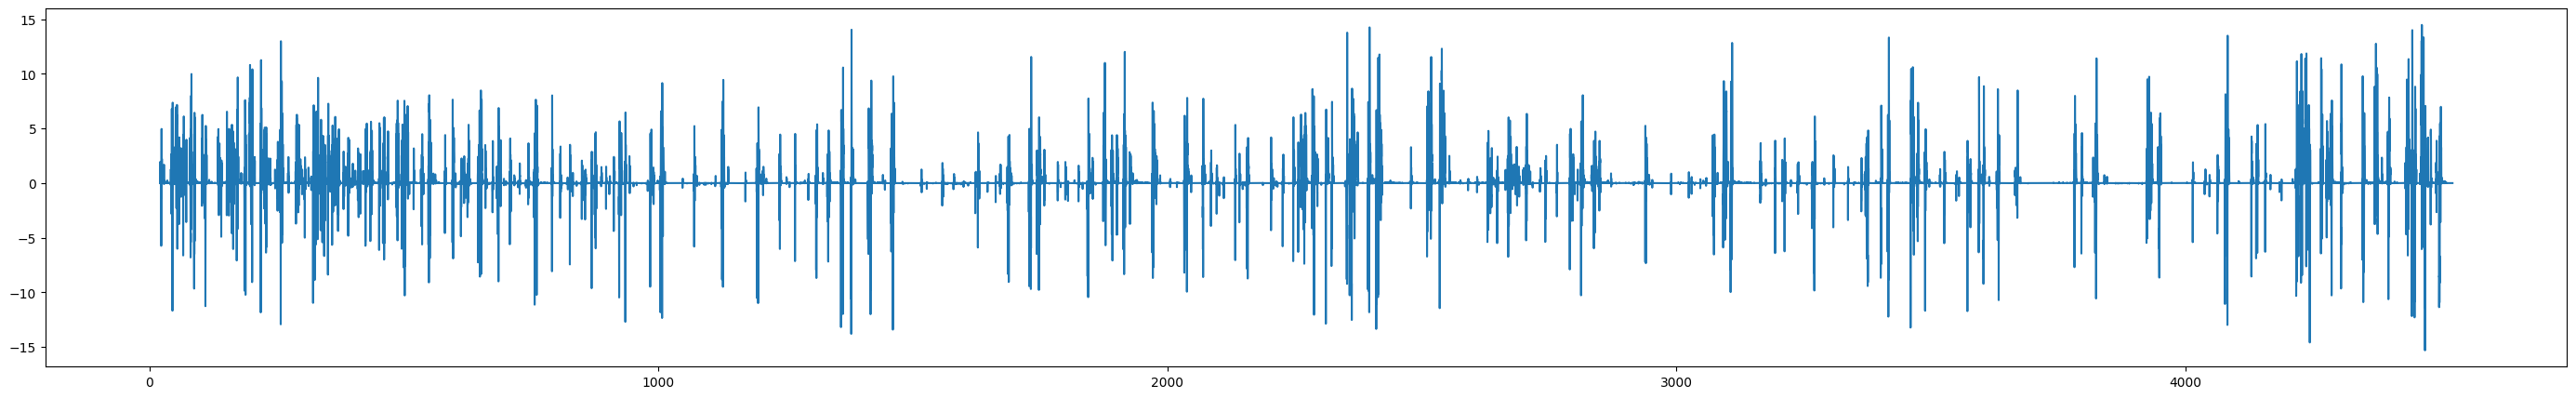

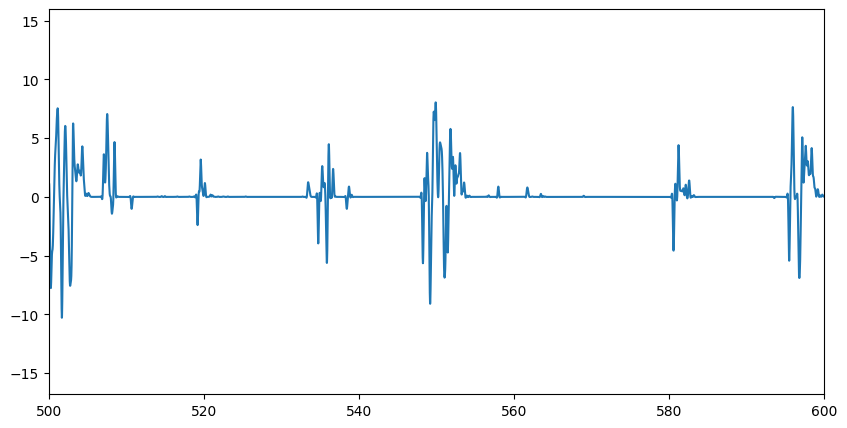

In [13]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(35, 5))
plt.plot(bs.running_speed.timestamps, bs.running_speed.speed)

# plot zoom on x
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(bs.running_speed.timestamps, bs.running_speed.speed)
plt.xlim(500, 600)

In [14]:
bs.stimulus_presentations

,duration,end_frame,image_name,index,omitted,orientation,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,
0,0.24999,18000.0,im000,0,False,NaN,17985,321.14628,321.39627
1,0.25018,18046.0,im000,1,False,NaN,18031,321.91328,322.16346
2,0.24967,18090.0,im000,2,False,NaN,18075,322.64779,322.89746
3,0.24985,18135.0,im000,3,False,NaN,18120,323.39822,323.64807
4,0.25032,18180.0,im000,4,False,NaN,18165,324.14856,324.39888
...,...,...,...,...,...,...,...,...,...
4796,0.25008,233823.0,im035,4600,False,NaN,233808,3921.35600,3921.60608
4797,0.25016,233868.0,im035,4601,False,NaN,233853,3922.10642,3922.35658
4798,0.25017,233913.0,im035,4602,False,NaN,233898,3922.85711,3923.10728


In [15]:
bs.stimulus_timestamps

0           21.14431
1           21.15926
2           21.17594
3           21.19260
4           21.20930
             ...    
270015    4525.31627
270016    4525.33299
270017    4525.34966
270018    4525.36632
270019    4525.38323
Length: 270020, dtype: float64

# Debugging cells

## PKL file reading/debug

In [16]:
from comb.behavior_session_grabber import BehaviorSessionGrabber
bsg = BehaviorSessionGrabber(raw_path)
pkl_file = pd.read_pickle(bsg.file_paths["stimulus_pkl"])

In [31]:
# print all keys in nested dictionary pkl_file
def print_keys(d, indent=0):
    for k, v in d.items():
        print("  " * indent + k)
        if isinstance(v, dict):
            print_keys(v, indent+1)

print_keys(pkl_file)

comp_id
unpickleable
items
  behavior
    ai
    trial_count
    ao
    lick_sensors
    rewards_dispensed
    volume_dispensed
    encoders
    behavior_path
    config_path
    auto_update
    trial_log
    window
      scrDistCM
      flipCounter
      warpGridsize
      color
      colorSpace
      pos
      useFBO
      recordFrameIntervalsJustTurnedOn
      origGammaRamp
      mon_height_pix
      aspect
      frames
      viewScale
      size
      ygrid
      monitor
        calibs
          2019_01_11 09:03
            distance
            psychopyVersion
            gammaGrid
            sizePix
            notes
            width
            linearizeMethod
            calibDate
            usebits
            gamma
        _gammaInterpolator
        name
        __type__
        autoLog
        currentCalib
          distance
          psychopyVersion
          gammaGrid
          sizePix
          notes
          width
          linearizeMethod
          calibDate
        

In [36]:
pkl_file["items"]["behavior"]["lick_sensors"][0].keys()

dict_keys(['items', 'lick_events', 'lick_data', 'line', 'unpickleable'])

In [39]:
pkl_file["items"]["behavior"]["lick_sensors"][0]["lick_data"]  

(array([13845, 13846, 13847, 18032, 18033, 18034, 18035, 18075, 18076,
        18077, 18078, 18383, 18384, 18385, 18566, 18567, 18568, 19321,
        19322, 19323, 19781, 19782, 19783, 22122, 22123, 22124, 24769,
        24770, 24771, 24786, 24787, 24788, 24789, 26248, 26249, 26250,
        26251, 28458, 28459, 28460, 28461, 28475, 28476, 28477, 28478,
        30794, 30795, 30796, 34444, 34445, 34446, 35434, 35435, 35436,
        35451, 35452, 35453, 35454, 39161, 39162, 39163, 39164, 41197,
        41198, 41199, 41207, 41208, 41209, 43359, 43360, 43361, 43362,
        44038, 44039, 44040, 44057, 44058, 44059, 47135, 47136, 47137,
        47138, 47145, 47146, 47147]),)

In [44]:
ts =pkl_file["items"]["behavior"]['intervalsms']

16.679000109434128

In [30]:
len(pkl_file["items"]["behavior"]["lick_sensors"][0]["lick_events"])

25

In [6]:
pkl_file["items"]["foraging"]["encoders"]

[{'counter_index': 0,
  'distance': array([91.706635  ,  0.2158311 ,  0.2158311 , ...,  0.6007299 ,
          0.59353554,  0.58274394], dtype=float32),
  'mdr0_register_setting': '3',
  'base_time': 0,
  'unpickleable': [],
  'timestamp': array([   0.      ,   10.268576,   10.285456, ..., 3755.4646  ,
         3755.4814  , 3755.498   ], dtype=float32),
  'arduino_version': '0.1.6+gb8626a0.b82975',
  'treadmill': False,
  'vin': array([5., 5., 5., ..., 5., 5., 5.]),
  'vsig': [0.560302734375,
   0.596923828125,
   0.633544921875,
   0.6695556640625,
   0.7049560546875,
   0.7403564453125,
   0.7763671875,
   0.8123779296875,
   0.849609375,
   0.885009765625,
   0.921630859375,
   0.958251953125,
   1.0333251953125,
   1.0333251953125,
   1.0699462890625,
   1.143798828125,
   1.143798828125,
   1.1798095703125,
   1.2493896484375,
   1.2835693359375,
   1.2835693359375,
   1.35009765625,
   1.3818359375,
   1.414794921875,
   1.44775390625,
   1.4801025390625,
   1.5130615234375,
   1.

## Sync File Debug

In [18]:
from comb.processing.sync.sync_dataset import SyncDataset
sync = SyncDataset(bsg.file_paths['sync_file'])

In [19]:
sync.line_labels

['vsync_2p',
 '',
 'vsync_stim',
 '',
 'stim_photodiode',
 'stim_running',
 '',
 '',
 'beh_frame_received',
 'eye_frame_received',
 'face_frame_received',
 '',
 '',
 '',
 '',
 '',
 '',
 'stim_running_opto',
 'stim_trial_opto',
 '',
 '',
 'beh_cam_frame_readout',
 'face_cam_frame_readout',
 '',
 '',
 'eye_cam_frame_readout',
 '',
 'beh_cam_exposing',
 'face_cam_exposing',
 'eye_cam_exposing',
 '',
 'lick_sensor']

In [53]:
sync.get_line('vsync_2p')

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [20]:
sync.line_stats(line='lick_sensor')

{'line': 'lick_sensor',
 'bit': 31,
 'total_data_points': 5754178,
 'total_events': 53,
 'total_rising': 27,
 'total_falling': 26,
 'avg_period': 168.94137239999998,
 'min_period': 0.11024,
 'max_period': 3737.80562,
 'period_sd': 0.0,
 'avg_freq': 0.005919213190906931,
 'duty_cycle': 'fix me'}

In [21]:
sync.stats()

[{'line': 0,
  'bit': 0,
  'total_data_points': 5754178,
  'total_events': 342616,
  'total_rising': 171308,
  'total_falling': 171308,
  'avg_period': 0.026293556909857217,
  'min_period': 0.02628,
  'max_period': 0.0263,
  'period_sd': 0.0,
  'avg_freq': 38.03213096761013,
  'duty_cycle': 'fix me'},
 {'line': 2,
  'bit': 2,
  'total_data_points': 5754178,
  'total_events': 540040,
  'total_rising': 270020,
  'total_falling': 270020,
  'avg_period': 0.016681198920071996,
  'min_period': 0.00428,
  'max_period': 0.09197,
  'period_sd': 0.0,
  'avg_freq': 59.94772946426107,
  'duty_cycle': 'fix me'},
 {'line': 4,
  'bit': 4,
  'total_data_points': 5754178,
  'total_events': 4516,
  'total_rising': 2258,
  'total_falling': 2258,
  'avg_period': 1.9969669414893616,
  'min_period': 0.15014,
  'max_period': 2.06832,
  'period_sd': 0.0,
  'avg_freq': 0.5007594163047027,
  'duty_cycle': 'fix me'},
 {'line': 5,
  'bit': 5,
  'total_rising': 1,
  'total_falling': 1,
  'avg_freq': None,
  'duty_

## Scrach: x-array

<xarray.DataArray 'RMSE' ()>
array(0.00506034)
Coordinates:
    cell_roi_id  int64 2

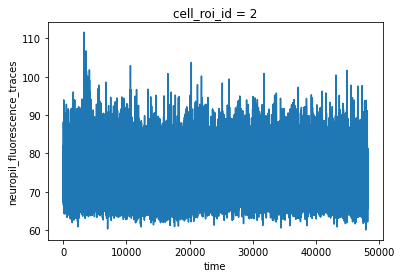

In [ ]:
import xarray as xr
dataset = OphysDataset("/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1098444819")
x = dataset.neuropil_traces_xr

# get cell_roi_id 0 from x 
cell_roi_id = 1
x.sel(cell_roi_id=cell_roi_id).neuropil_fluorescence_traces.plot.line()
x.sel(cell_roi_id=cell_roi_id).RMSE


In [ ]:
bod.cell_specimen_table.valid_roi.value_counts()
d = np.where(np.isnan(bod.dff_traces.iloc[4].dff))[0]
d.shape